<a href="https://colab.research.google.com/github/subratmahavoi/line-Paasenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

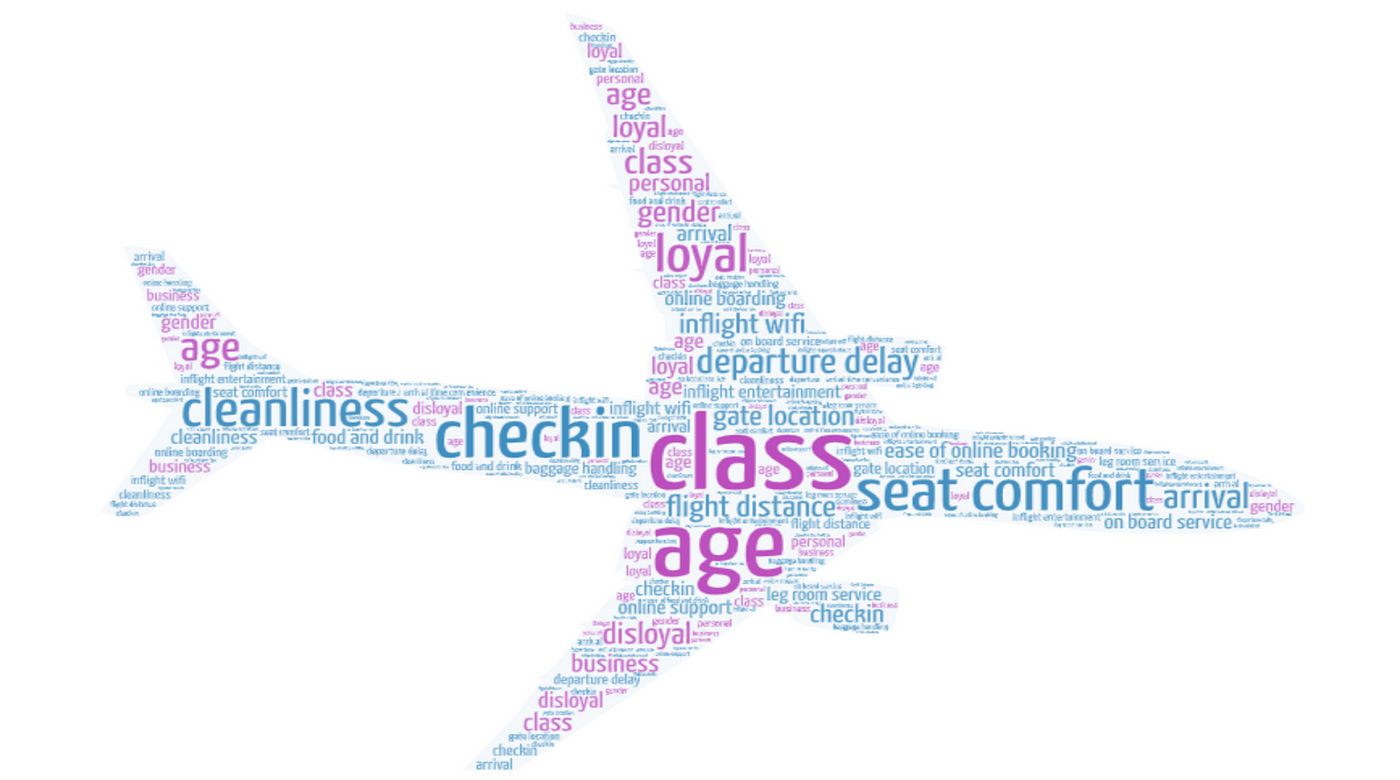

# **Project Name : Airline Paasenger Referral Prediction(Classification)**

**Project Type -ML Model**

**Contribution :**

*   **Subrat Mahavoi**
*   **Sunny Kumar**



# **Project Summary**

This project focuses on leveraging machine learning classification techniques to predict the likelihood of passengers booking a flight when referred by an existing customer. The analysis is based on diverse factors such as seat comfort, cabin service, travel class, food and beverage quality, entertainment service, etc. By harnessing historical passenger and booking data, the developed model aims to provide accurate predictions for new data instances. The end goal is to empower airlines with a tool that enables targeted marketing campaigns, directing efforts towards potential passengers who are more inclined to book a flight upon receiving a referral from an existing customer.

# **Objective**

The dataset, comprising airline reviews spanning from 2016 to 2019 for globally renowned airlines, involves both multiple choice and free-text questions. Scraped in spring 2019, the primary objective is to predict whether passengers will recommend the airline to their friends based on their experiences.

# **Github Link**

https://github.com/subratmahavoi/line-Paasenger-Referral-Prediction

# **Problem Statement**

The airline industry aims to improve customer satisfaction and increase passenger referrals. Analysis of passenger reviews reveals key areas for enhancement, including cabin service, entertainment, and seat comfort. The challenge is to develop a machine learning model that accurately predicts whether passengers will recommend the airline to their friends, allowing airlines to prioritize improvements and enhance overall customer experience.

# ***Let's Begin !***

# 1.**Know Your Data**

## import libraries

In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
#libraries for model evalution
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score,precision_score


### Dataset Loading

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Dataset
airline_df = pd.read_excel('/content/drive/MyDrive/Airline_Passenger_Prediction/data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset first look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows and Columns Count

In [ ]:
#Dataset Rows and Columns Count
print(airline_df.shape)

(131895, 17)


Total 131895 rows and 17 columns are present in our dataset

### Dataset Information

In [ ]:
#Datset Information
print(airline_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

### Checking Duplicate Values

In [ ]:
#Dataet duplicate value counts
airline_df.duplicated().value_counts()

True     70711
False    61184
dtype: int64

In [ ]:
#getting duplicate values
print(f' Duplicate data count = {airline_df[airline_df.duplicated()].shape[0]}')
airline_df[airline_df.duplicated()]

 Duplicate data count = 70711


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#droping the null values
airline_df.drop_duplicates(inplace = True)

In [ ]:
#count dupicate values
airline_df.duplicated().sum()

0

### Missing values / Null values


In [ ]:
#count missing values / null values
print(airline_df.isnull().sum())

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64


<Axes: >

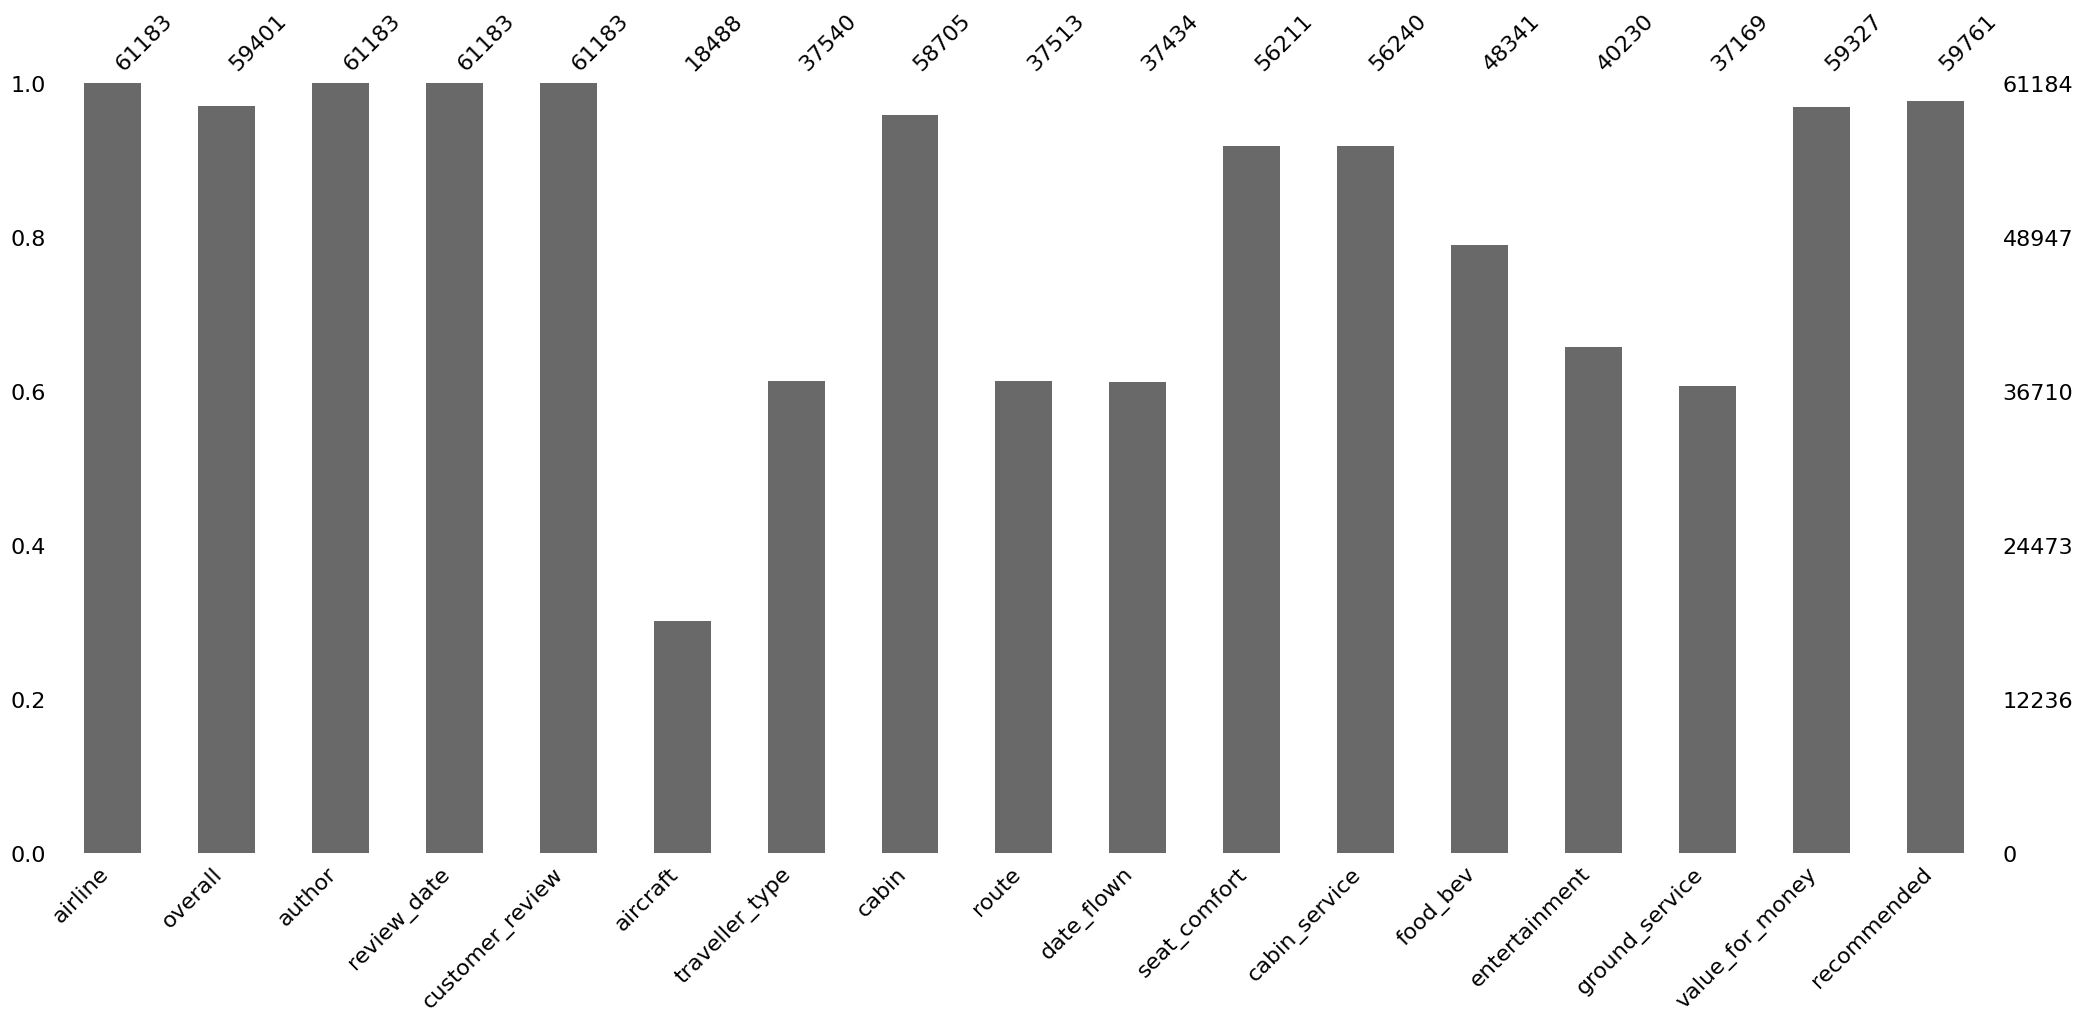

In [ ]:
#visulization of missing values
msno.bar(airline_df)

As we can see above graph, so many missing values are present in dataset.

## What did you know about your dataset?



*   There are 131895  total observation with 17 different features.
*   All the Feature like aircraft,author and airline has null values.
*   There are duplicate values i.e., 70711 duplicate data.








# **2.Understanding Your Variables**

In [ ]:
#Dataset columns
print(f'Features: {airline_df.columns.to_list()}')

Features: ['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']


In [ ]:
#Dataset describe
airline_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,37434,63,August 2015,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Variable Decription

•	airline:Name of the airline

•	overall : Overall point is given to the trip between 1 to 10.

•	author : Author of the trip

•	review_date : Date of the Review

•	customer_review : Review of the customers in free text format

•	aircraft : Type of the aircraft

•	traveller_type : Type of traveller(e.g. business,lesisure)

•	cabin : Cabin at the flight date flowan: Flight date

•	seat_comfort : Rated between 1-5

•	cabin_service : Rated between 1-5

•	food_bev : Rated between 1-5

•	entertainment : Rated between 1-5

•	ground_service : Rated between 1-5

•	value_for_money : Rated between 1-5

•	recommended : Binary, target variable




### Check Unique value for each variable

In [ ]:
#Unique values for each variable
for i in airline_df.columns.tolist():
  print(f'Number of unique value in {i} is {airline_df[i].nunique()}.')

Number of unique value in airline is 81.
Number of unique value in overall is 10.
Number of unique value in author is 44069.
Number of unique value in review_date is 3015.
Number of unique value in customer_review is 61172.
Number of unique value in aircraft is 2088.
Number of unique value in traveller_type is 4.
Number of unique value in cabin is 4.
Number of unique value in route is 24549.
Number of unique value in date_flown is 63.
Number of unique value in seat_comfort is 5.
Number of unique value in cabin_service is 5.
Number of unique value in food_bev is 5.
Number of unique value in entertainment is 5.
Number of unique value in ground_service is 5.
Number of unique value in value_for_money is 5.
Number of unique value in recommended is 2.


# **3.EDA**

**Chart 1:Displot for distribution**

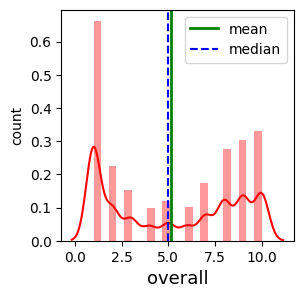

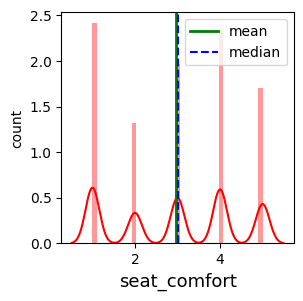

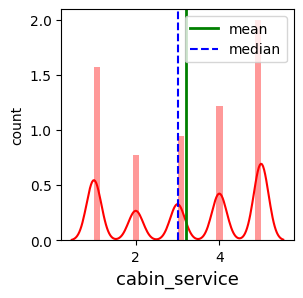

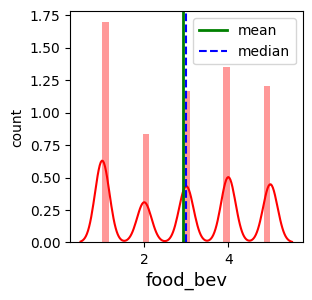

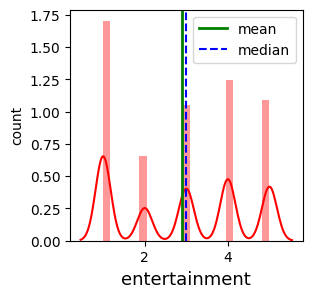

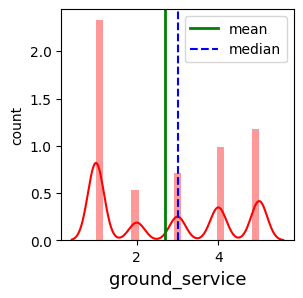

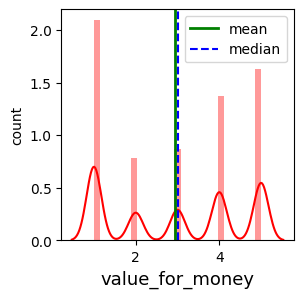

In [ ]:
#visulization of distribution
for col in [ 'overall',   'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']:
  plt.figure(figsize=(3,3))
  sns.distplot(airline_df[col], color='r')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(airline_df[col].mean(),color='green',linewidth=2,label='mean')
  plt.axvline(airline_df[col].median(),color='blue',linestyle='dashed',linewidth=1.5,label='median')
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
  plt.show()

*   Most of the passenger give overall rating around 4.5.
*   Most of the people give seat comfort service rating around 3.
*   Most of the people give cabin_service rating around 3.1
*   Most of the people give food_bev service rating around 3
*   Most of the people give entertainment service rating around 2.9
*   Most of the people give ground service rating around 3
*   Most of the people give value_for_money rating around 3



**Chart 2:Which Traveller_type has more ratings?**

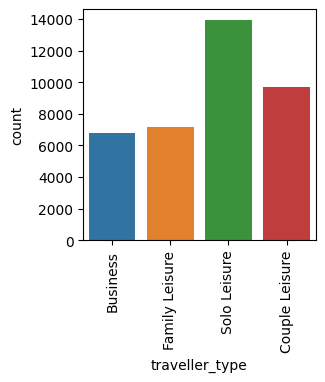

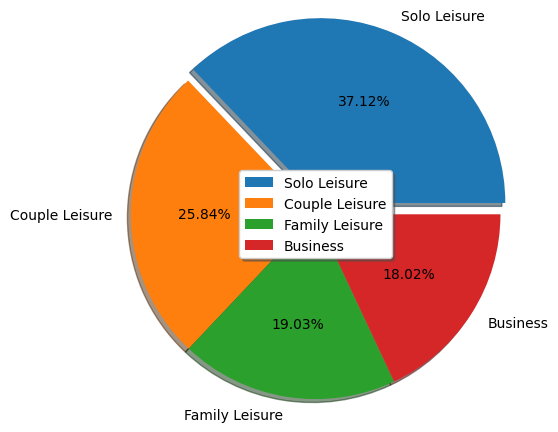

In [ ]:
#set the fig size and plotting the graph
airline_df.dropna(subset=['traveller_type'],inplace=True)
plt.figure(figsize=(3,3))
sns.countplot(x=airline_df['traveller_type'],data=airline_df)
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_traveller = ['Solo Leisure','Couple Leisure','Family Leisure','Business']
data1 = airline_df['traveller_type'].value_counts().values
explode = [0.1, 0, 0, 0]
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data1, labels = label_for_traveller,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 10})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


•	As we can see above graph,Solo Lesisure has the highest value counts, we can  conclude that most people who travel by airline travel is solo.37.22% people who travel by airline is solo.Followed by couple and family.



**Chart 3:Which type of Cabin has more recommendation?**

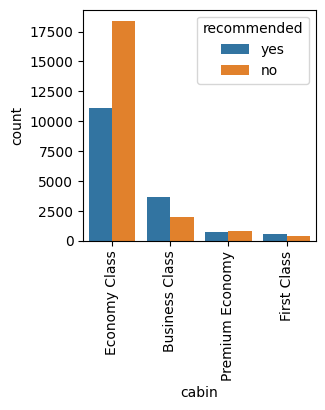

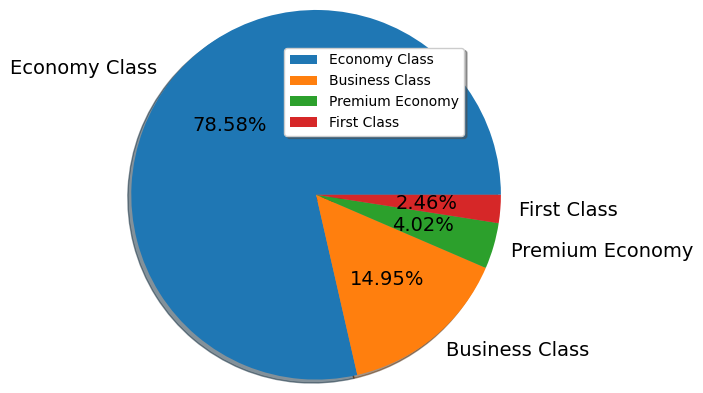

In [ ]:
#setting the figure size and plotting the graph
airline_df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(3,3))
sns.countplot(x=airline_df['cabin'],hue=airline_df['recommended'])
plt.xticks(rotation=90)
plt.show()

print(" ")


label_for_cabin = ['Economy Class','Business Class','Premium Economy','First Class']
data2 = airline_df['cabin'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data2, labels = label_for_cabin,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='upper right',shadow=True,fancybox=True)
plt.show()

•	As we can see above graph,Economy class has the highest counts with bad ratings.

•	We can conclude that most of the people around 78.44% people choose economy class to travel by airline.Followed by Business class and others



**Chart 4:Percentage of Cabin-Service Rating by passengers**

5.0    10715
1.0     9735
4.0     6100
3.0     5367
2.0     4568
Name: cabin_service, dtype: int64
[10715  9735  6100  5367  4568]


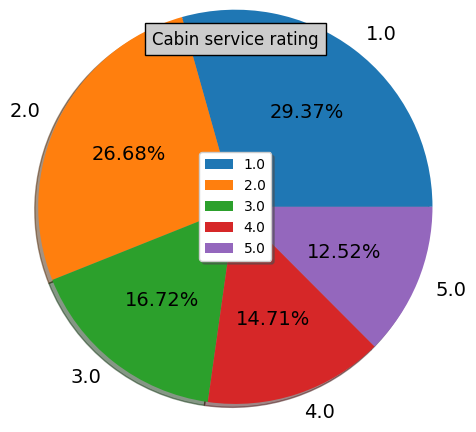

In [ ]:
#setting the figure size and plotting the graph
label_for_cabin_service = ['1.0','2.0','3.0','4.0','5.0']
data3 = airline_df['cabin_service'].value_counts().values
print(airline_df['cabin_service'].value_counts())
print(data3)
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Cabin service rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data3, labels = label_for_cabin_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()




•	24% passengers are not satisfied with cabin-service as they give 1.0 rating.

•	50% passenger are giving 4.0 and 5.0 rating for cabin-service when overall rating of airline is good.So,we can say good cabin-service positively impacts airline businesses


**Chart 5: In Economy Class what is the average ratings of Food_bev and     entertainment given by passenger?**


<Axes: xlabel='cabin'>

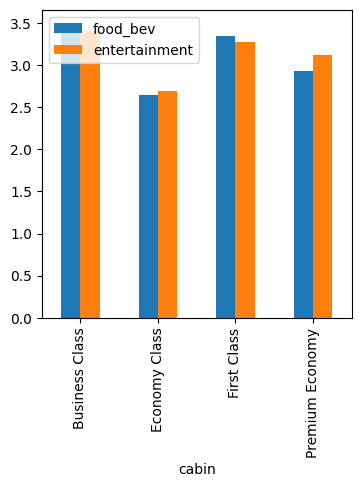

In [ ]:
#setting the figure size and plotting the graph
gp_by_cabin=airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
plt.rcParams['figure.figsize']=(4,4)
gp_by_cabin.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")



•	From above graph,
  In Economy Class the average ratings of Food_bev and entertainment
  given by  passenger is lowest compared to other cabin classes.


**Chart 6:Percentage of Food-Beverage Rating by passengers**

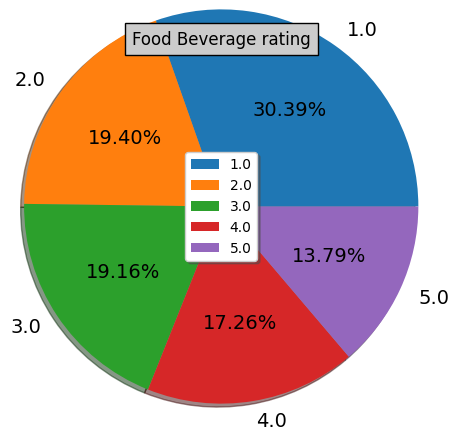

In [ ]:
#setting the figure size and plotting the graph
label_for_food_service = ['1.0','4.0','5.0','3.0','2.0']
data3 = airline_df['food_bev'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Food Beverage rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data3, labels = label_for_cabin_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


•	27% passengers are not satisfied with food-service as they giving 1.0 rating.

•	36% passengers are giving 4.0 and 5.0 rating for food service so we conclude that overall rating of arline is good.So,we can say good food beverage service positively impacts airline businesses.


**Chart 7:Variation of Recommendation feature with Seat comfort**

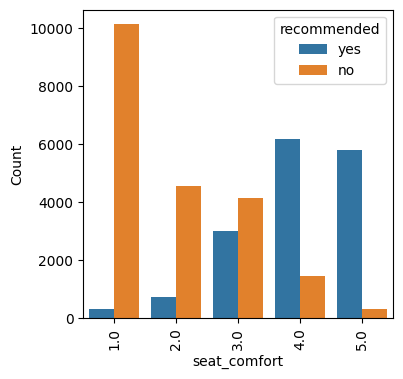

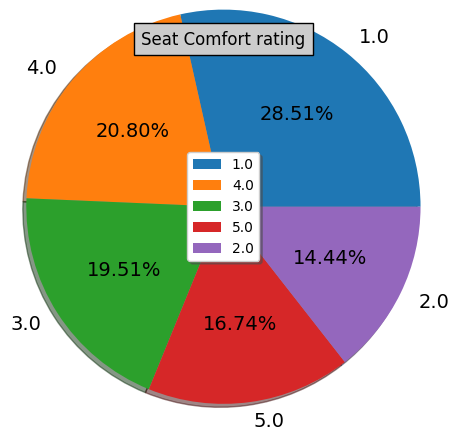

In [ ]:
#setting the figure size and plotting the graph
airline_df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=airline_df['seat_comfort'],hue=airline_df['recommended'])
plt.xlabel('seat_comfort')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

print(" ")
label_for_seat_service = ['1.0','4.0','3.0','5.0','2.0']
data4 = airline_df['seat_comfort'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Seat Comfort rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data4, labels = label_for_seat_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


•	In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same.

•	Also we can see seat class 1 have been given highest negative recommendation as compare to it's positive recommendation.Here we come to a conclusion it must be removed as early as possible.

•	25% people are not satisfied with seat comfort.As they give 1.0 rating.

•	42% people are giving 4.0 and 5.0 rating for seat comfort.So overall rating is good.So we can say that good value for seat comfort service positively impact airline business.


**Chart 8: Variation of Recommendation feature with entertainment**

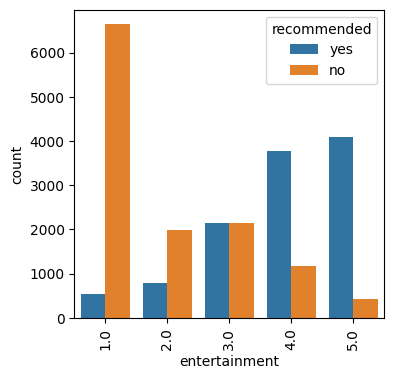

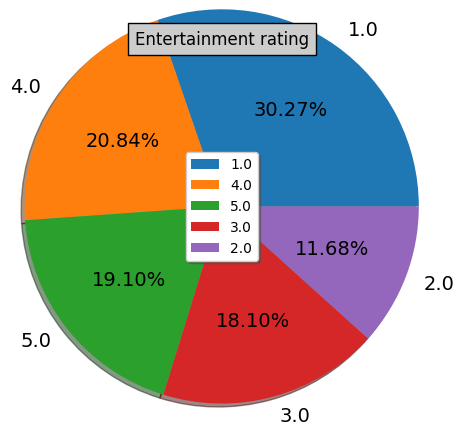

In [ ]:
#setting the figure size and plotting the graph
airline_df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=airline_df['entertainment'],hue=airline_df['recommended'])
plt.xlabel('entertainment')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_ent_service = ['1.0','4.0','5.0','3.0','2.0']
data5 = airline_df['entertainment'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('Entertainment rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data5, labels = label_for_ent_service,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


•	In entertainment also we can see most of the people give highest negative recommendation to entertainment rating 1 which shows that airline has to improve their entertainment system as well.

•	30% people are not satisfied with entertainment service.As they give 1.0 rating.

•	38% people are giving 4.0 and 5.0 rating for seat comfort.So overall rating is bad.So we can say that bad value for entertainment service negatively impact airline business.


**chart 9:Variation of Recommendation feature with value_for_money**

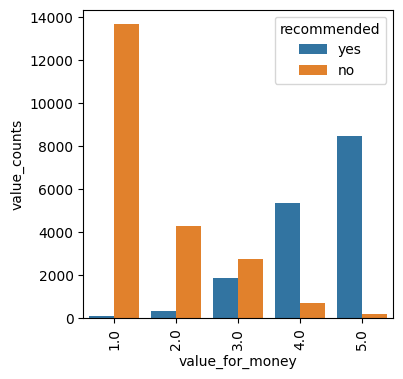

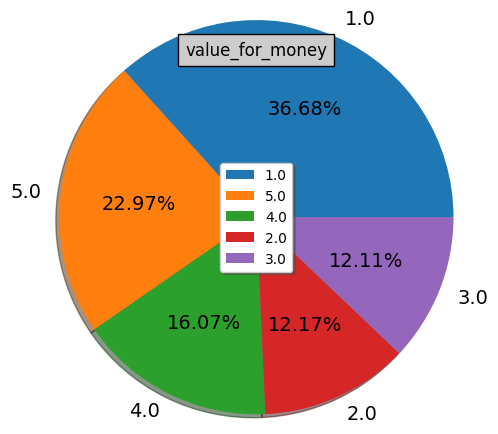

In [ ]:
#setting the figure size and plotting the graph
airline_df.dropna(subset=['recommended'],inplace=True)
plt.figure(figsize=(4,4))
sns.countplot(x=airline_df['value_for_money'],hue=airline_df['recommended'])
plt.xlabel('value_for_money')
plt.ylabel('value_counts')
plt.xticks(rotation=90)
plt.show()

print(" ")

label_for_money = ['1.0','5.0','4.0','2.0','3.0']
data6 = airline_df['value_for_money'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('value_for_money',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data6, labels = label_for_money,radius=1.6,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()


•	In value_for_money people has given highest positive recommended to the money value of class 5 as compared to very low negative recommendation to the same.

•	Also we can see seat class 1 have been given highest negative recommendation as compare to it's positive recommendation.Here we come to a conclusion it must be removed as early as possible.

•	36% people are not satisfied with value_for_money service.As they give 1.0 rating.40% people are giving 4.0 and 5.0 rating for value_for_money.So overall rating is avg.So we can say that avg value for money service may be negatively impact airline business.


**Chart 10:Percentage of overall rating by passengers**

1.0     12621
10.0     4361
9.0      4083
2.0      3801
8.0      3655
3.0      2421
7.0      2315
5.0      1481
4.0      1439
6.0      1361
Name: overall, dtype: int64


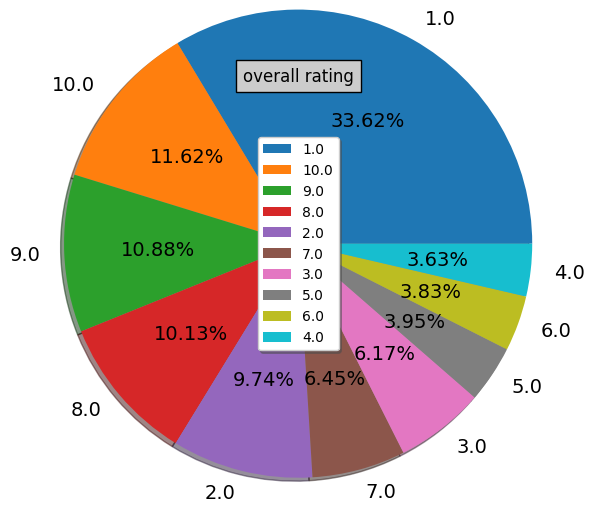

In [ ]:
#setting the fig size and plotting the graph
label_for_overall_rating = ['1.0','10.0','9.0','8.0','2.0','7.0','3.0','5.0','6.0','4.0']
data7 = airline_df['overall'].value_counts().values
print(airline_df['overall'].value_counts())
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.title('overall rating',bbox={'facecolor':'0.8', 'pad':5})
plt.pie(data7, labels = label_for_overall_rating,radius=1.9,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

•	45% of passengers gave an overall rating of 7 and above on a scale of 10,for the services offered by the airlines.It implies that this section of people think that airline are giving good services.

•	42% passengers gave an overall rating below 3.0 . So it,suggests that people are not very much satisfied with airline services.There are still need of improvements


# **4.Data Cleaning**

### Droping Unnecessary Columns

In [ ]:
#count percentage wise missing values
def missing_value_check(df):
  per_miss_values = airline_df.isnull().sum() * 100 / len(airline_df)
  miss_values_df = pd.DataFrame({'Feature_name':airline_df.columns,
                                 'percentage':per_miss_values})
  return miss_values_df.sort_values('percentage',ascending=False)

In [ ]:
#checking percentage wise missing values
missing_value_check(airline_df)

,Feature_name,percentage
aircraft,aircraft,50.757878
entertainment,entertainment,36.785743
food_bev,food_bev,20.994166
cabin_service,cabin_service,2.807747
seat_comfort,seat_comfort,2.645249
ground_service,ground_service,0.990969
date_flown,date_flown,0.285037
route,route,0.079917
cabin,cabin,0.050614
value_for_money,value_for_money,0.010656


In [ ]:
#check unique aircraft names
airline_df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [ ]:
#check number of unique values in aircraft
airline_df.aircraft.nunique()

2087

Drop NA values in aircraft,because aircraft feature has highest null values

In [ ]:
airline_df = airline_df.drop(['aircraft'],axis=1)

In [ ]:
#drop unnecessary columns,which are not for our use
airline_df = airline_df.drop(['author','review_date', 'route', 'date_flown', 'customer_review'],axis=1)

In [ ]:
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


Reason for droping columns:

Author - Being the categorical with high Variability not required for prediction.

Route - Not needed for building a model as it is independent of the Services and Quality of travel.

Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates.

Review_date - Similar to Date_flown

Customer_review - As it is related to overall review feature of the datasets.

In [ ]:
#splitting the numeric column based on null values
low_null_val = ['overall','seat_comfort','cabin_service','value_for_money']
high_null_val = ['food_bev','entertainment','ground_service']


In [ ]:
#imputation technique using Q1 value(for low null values)
def imput_by_q1(df,col):
  q1 = np.percentile(np.sort(df[col].dropna()),25)
  df[col].fillna(q1,inplace=True)

In [ ]:
#looping the NA/NULL values
for col in low_null_val:
  imput_by_q1(airline_df,col)

In [ ]:
#imputation technique using median technique(for high null values)
def imput_by_med(df,col):
  df[col].fillna(df[col].median(),inplace=True)

In [ ]:
#looping the NA/NULL values
for col in high_null_val:
  imput_by_med(airline_df,col)

In [ ]:
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#remove null value from recommended column
airline_df.dropna(subset=['recommended'],inplace=True)

In [ ]:
#handle na values in traveller_type column
airline_df['traveller_type'].fillna(method='ffill',inplace=True)

In [ ]:
#handle na values in cabin column
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

In [ ]:
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#checking null values after data cleaning
missing_value_check(airline_df)

,Feature_name,percentage
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


After data cleaning,no missing values are found

In [ ]:
airline_df.shape

(37539, 11)

# **5.Feature Engineering**

## **Correlation Matrix**

<Axes: >

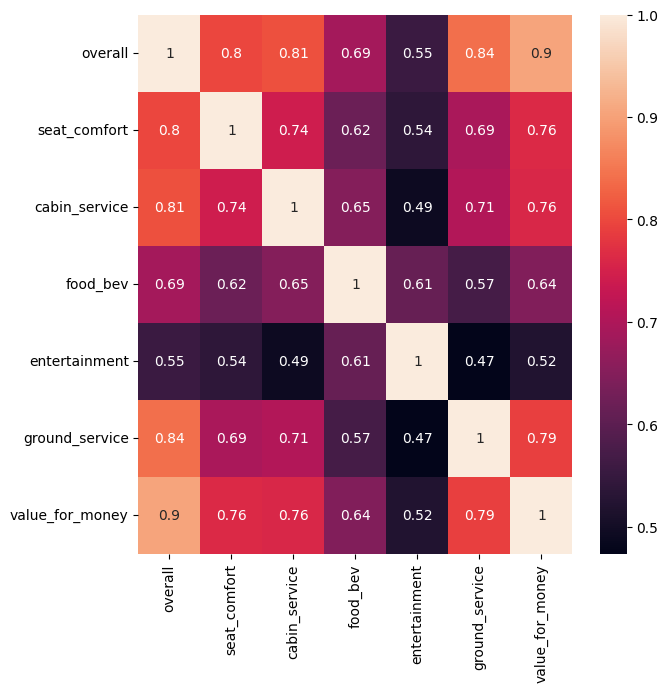

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(airline_df.corr(),annot=True)

overall feature has a highest correlation value than other,so drop overall column.

**Removing Multicollinearity features**

In [ ]:
#Creating a function to remove multicollinear
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:

calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended','value_for_money','overall']]])


,variables,VIF
0,seat_comfort,12.630363
1,cabin_service,13.133383
2,food_bev,12.019264
3,entertainment,9.394911
4,ground_service,8.843739


In [ ]:
#drop overall column
airline_df.drop(['overall'],axis=1,inplace=True)

In [ ]:
#drop airline column
airline_df.drop(['airline'],axis=1,inplace=True)

In [ ]:
airline_df.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


## **Label Encoding**

In [ ]:
#converting target column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
airline_df.head()

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0
7,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1
9,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0


## **Defining Independent And Dependent Features**

In [ ]:
#seperate independent and dependentfeatures
y = airline_df['recommended']
x = airline_df.drop(columns='recommended')

## **One Hot Encoding**

In [ ]:
#encoding
x = pd.get_dummies(x)
x

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0
5,1.0,4.0,1.0,3.0,1.0,2.0,1,0,0,0,0,1,0,0
7,4.0,5.0,5.0,5.0,5.0,5.0,0,0,0,1,0,1,0,0
9,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131706,1.0,2.0,1.0,3.0,2.0,2.0,1,0,0,0,0,1,0,0
131708,3.0,1.0,3.0,3.0,1.0,3.0,0,1,0,0,0,1,0,0
131710,2.0,2.0,3.0,3.0,4.0,1.0,0,0,0,1,0,1,0,0
131712,1.0,1.0,1.0,3.0,1.0,5.0,0,1,0,0,0,1,0,0


## **Handling Class Imbalance**

The Percentage of No labels of Target Variable is 57.0
The Percentage of Yes labels of Target Variable is 43.0


<Axes: xlabel='recommended', ylabel='count'>

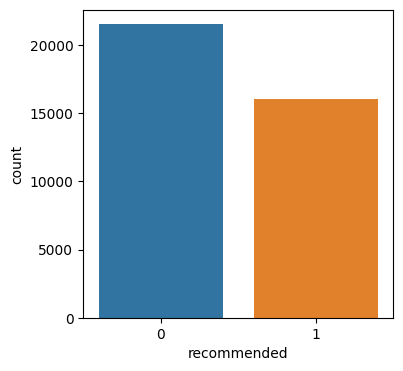

In [ ]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))
sns.countplot(x=airline_df['recommended'],data=airline_df)

Here the percentage of (yes,no) is approximately equal. So no need to handling class imbalanace

# **6.Data Preprocessing**

In [ ]:
#splitting train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
#shape of x_train and x_test
print(x_train.shape)
print(x_test.shape)

(28154, 14)
(9385, 14)


In [ ]:
#shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)

(28154,)
(9385,)


# **7.Model Building**

## **1.Logistic Regression**

In [ ]:
#logistic regreesion fitting
log_class = LogisticRegression(max_iter=10000)
log_class.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
#predicting the result
y_pred_logclass = log_class.predict(x_test)

In [ ]:
#training and testing score
print(log_class.score(x_train,y_train))
print(log_class.score(x_test,y_test))


0.947289905519642
0.9427810335641982


In [ ]:
#report of logistic regression
report_lR = classification_report(y_test, y_pred_logclass)
print(report_lR)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5335
           1       0.94      0.93      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.94      0.94      9385
weighted avg       0.94      0.94      0.94      9385



We get 94% accuracy with Logistic Regression

<Axes: >

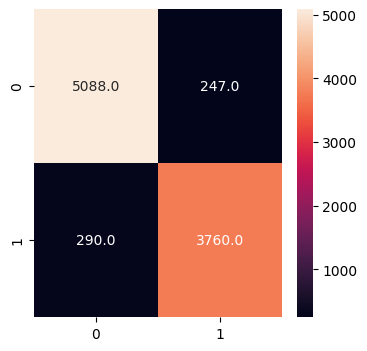

In [ ]:
#confusion matrix of logistic regression
confuse_mat_lr = confusion_matrix(y_test,y_pred_logclass)

#plotting confusion matrix
sns.heatmap(confuse_mat_lr, annot=True, fmt = ".1f")

### **Logistic Regression With Cross Validation**

In [ ]:
#cross validation
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2','elasticnet','none']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
#hyper parameter tuning
clf_logclass = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [ ]:
#fit training data
clf_logclass.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_macro')

In [ ]:
#predicting the result
y_pred_hyper_logclass = clf_logclass.predict(x_test)

In [ ]:
#training and testing data score
print(clf_logclass.score(x_train,y_train))
print(clf_logclass.score(x_test,y_test))


0.9463098845889563
0.9412911566611756


In [ ]:
#best parameters after hyper-parameter tuning
print(clf_logclass.best_params_)

{'C': 0.01, 'penalty': 'l2'}


In [ ]:
#report of logistic regression with hyper-parameter tuning
report_lR_hyper = classification_report(y_test, y_pred_hyper_logclass)
print(report_lR_hyper)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5335
           1       0.94      0.93      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.94      0.94      9385
weighted avg       0.94      0.94      0.94      9385



<Axes: >

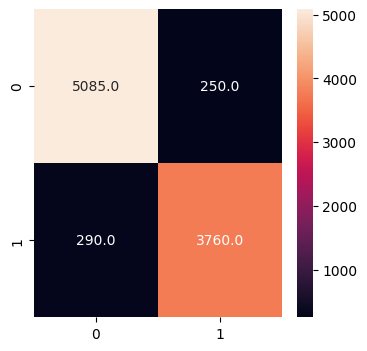

In [ ]:
#confusion matrix of logistic regression with hyper-parameter tuning
confuse_mat_lr_hyper = confusion_matrix(y_test,y_pred_hyper_logclass)

#plotting confusion matrix
sns.heatmap(confuse_mat_lr_hyper, annot=True, fmt = ".1f")

After hyper-parameter tuning we get 93% accuracy.But if we analyze above graph,number of miss classification is decreased.

## **2.Decision Tree Classifier**

In [ ]:
#Intialize decision tree model
decision_tree_class = DecisionTreeClassifier()

#fit training data
decision_tree_class.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#predict the result
y_pred_decision_tree = decision_tree_class.predict(x_test)

In [ ]:
#training and testing score
print(decision_tree_class.score(x_train,y_train))
print(decision_tree_class.score(x_test,y_test))

0.9843006322369823
0.9187000532765051


In [ ]:
##report of decision tree classifier
report_dt = classification_report(y_test, y_pred_decision_tree)
print(report_dt)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5335
           1       0.92      0.89      0.90      4050

    accuracy                           0.92      9385
   macro avg       0.92      0.92      0.92      9385
weighted avg       0.92      0.92      0.92      9385



<Axes: >

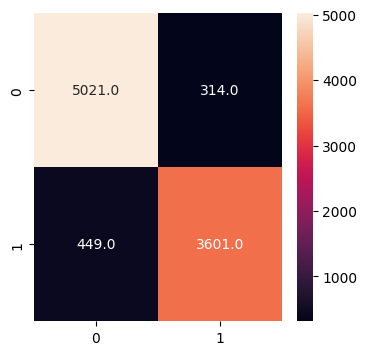

In [ ]:
#confusion matrix for decision tree classifier
con_mat_decision_tree = confusion_matrix(y_test,y_pred_decision_tree)

#plotting the confusion matrix
sns.heatmap(con_mat_decision_tree,annot=True,fmt='.1f')

As we can see, accuracy score is 92%. And also difference between training and testing score is more,so overfitting is occur.

Apply hyper-parameter tuning , to overcome overfitting problem.

### **Decision Tree With Hyper-Parameter tuning**

In [ ]:
#preprunning
params = {
    'criterion':['gini','entropy','logloss'],
    'splitter' : ['best','random'],
    'max_depth':[5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    "min_samples_split":[5,7]
    # "min_samples_leaf":[2,3]
}

In [ ]:
#hyper-parametr tuning
clf_decision_tree = GridSearchCV(decision_tree_class,params,cv=cv,n_jobs=-1,scoring='accuracy')

In [ ]:
#fit train data
clf_decision_tree.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 7],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
#predict result
y_pred_decision_tree_hyper = clf_decision_tree.predict(x_test)

In [ ]:
#best parameters of hyper-parameter tuning
print(clf_decision_tree.best_params_)
print(clf_decision_tree.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 7, 'splitter': 'best'}
0.9372738074847653


In [ ]:
#accuracy score of train and test data
print(clf_decision_tree.score(x_train,y_train))
print(clf_decision_tree.score(x_test,y_test))

0.9434893798394545
0.9347895578050079


In [ ]:
#report of decision tree classifier with hyper-parameter tuning
report_dt_hyper = classification_report(y_test,y_pred_decision_tree_hyper)
print(report_dt_hyper)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5335
           1       0.93      0.92      0.92      4050

    accuracy                           0.93      9385
   macro avg       0.93      0.93      0.93      9385
weighted avg       0.93      0.93      0.93      9385



<Axes: >

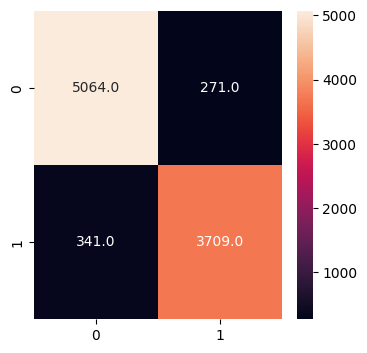

In [ ]:
#confusion matrix
con_mat_dt_hyper = confusion_matrix(y_test,y_pred_decision_tree_hyper)

#plot confusion matrix
sns.heatmap(con_mat_dt_hyper,annot=True,fmt=".1f")

With help of hyper-parameter tuning reduce overfitting in Decision Tree.And accuracy score is 92.87%.

# **3.Random Forest Classifier**

In [ ]:
#Intailize random forest model
random_forest_classifier = RandomForestClassifier()
#fit train data
random_forest_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#predict result
y_pred_rf = random_forest_classifier.predict(x_test)

In [ ]:
#get train and test score
print(random_forest_classifier.score(x_train,y_train))
print(random_forest_classifier.score(x_test,y_test))

0.9843006322369823
0.9354288758657432


In [ ]:
#report of random forest classifier
report_rf_classifier = classification_report(y_test,y_pred_rf)
print(report_rf_classifier)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5335
           1       0.94      0.91      0.92      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.93      0.93      9385
weighted avg       0.94      0.94      0.94      9385



<Axes: >

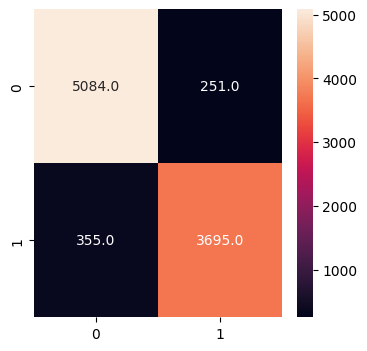

In [ ]:
#confusion matrix
con_mat_rf = confusion_matrix(y_test,y_pred_rf)

#plot confusion matrix
sns.heatmap(con_mat_rf,annot=True,fmt=".1f")

93% accuracy with Random Forest, but we can see some difference between train and test score,some overfitting scienario is there . Now we need to reduce these difference with help of hyper-parameter tuning

### **Random Forest With Hyper-Parameter Tuning**

In [ ]:
#prepruning
params_rf = {
    'criterion':['gini','entropy','logloss'],
    'max_depth': [2,3,5,7,10],
    'min_samples_leaf': [5,7,10],
    "min_samples_leaf":[2,3],
    'n_estimators': [10,25,30]
}

In [ ]:
#hyper-parameter tuning
clf_rf = GridSearchCV(random_forest_classifier,params_rf,cv=cv,n_jobs=-1,scoring='accuracy')

In [ ]:
# fit train data
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy')

In [ ]:
#predict result
y_pred_rf_hyper=clf_rf.predict(x_test)

In [ ]:
#train and test score
print(clf_rf.score(x_train,y_train))
print(clf_rf.score(x_test,y_test))

0.9561696384172764
0.9410761854022376


In [ ]:
#best parameters after hyper-parameter tuning
print(clf_rf.best_params_)
print(clf_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 30}
0.9474674986507386


In [ ]:
#report of random forest classifier
report_rf_classifier_hyper = classification_report(y_test,y_pred_rf_hyper)
print(report_rf_classifier_hyper)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5335
           1       0.94      0.92      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.94      0.94      9385
weighted avg       0.94      0.94      0.94      9385



<Axes: >

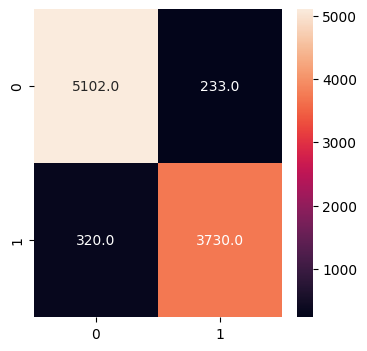

In [ ]:
#confusion matrix
con_mat_rf_hyper = confusion_matrix(y_test,y_pred_rf_hyper)

#plot confusion matrix
sns.heatmap(con_mat_rf_hyper,annot=True,fmt='.1f')

As we can see that overfitting is reduced,our train and test score are close as compared to without hyper-parameter tuning in random forest,
and we get 93% accuracy.

Best accuracy is 94%.

Classification error is also reduced ,as we can see above graph.

# **4.K-Nearest Neighbour Classifier**

In [ ]:
#define knn mode
knn_classifier = KNeighborsClassifier()
#fit train data
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#predict result
y_pred_knn = knn_classifier.predict(x_test)

In [ ]:
#train and test score
print(knn_classifier.score(x_train,y_train))
print(knn_classifier.score(x_test,y_test))

0.9565958655963629
0.9374533830580714


In [ ]:
#report of knn
report_knn_classifier = classification_report(y_test,y_pred_knn)
print(report_knn_classifier)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5335
           1       0.94      0.92      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.93      0.94      9385
weighted avg       0.94      0.94      0.94      9385



<Axes: >

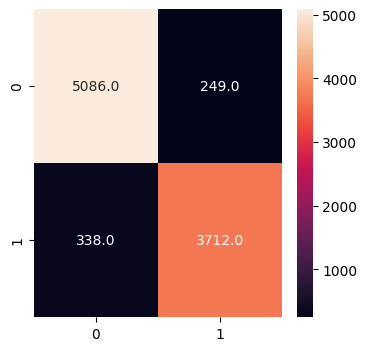

In [ ]:
#confusion matrix
con_mat_knn  = confusion_matrix(y_test,y_pred_knn)

#plot confusion matrix
sns.heatmap(con_mat_knn,annot=True,fmt=".1f")


93% accuracy with KNN classifier.Here train and test score is also close.

# **5.Support Vector Machine**

In [ ]:
#define model
support_vector = LinearSVC()

#fit train data
support_vector.fit(x_train,y_train)

LinearSVC()

In [ ]:
#predict the result
y_pred_svm = support_vector.predict(x_test)

In [ ]:
#train and test score
print(support_vector.score(x_train,y_train))
print(support_vector.score(x_test,y_test))

0.9472543865880514
0.9432072456046884


In [ ]:
#report of svm
report_svm= classification_report(y_test,y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5335
           1       0.94      0.93      0.93      4050

    accuracy                           0.94      9385
   macro avg       0.94      0.94      0.94      9385
weighted avg       0.94      0.94      0.94      9385



<Axes: >

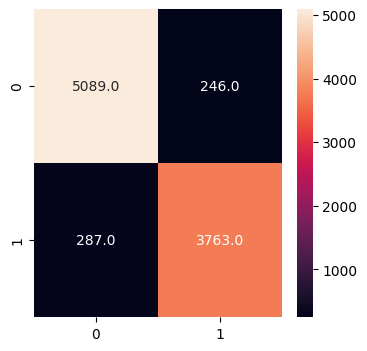

In [ ]:
#confusion matrix
con_mat_svm = confusion_matrix(y_test,y_pred_svm)

#plot confusion matrix
sns.heatmap(con_mat_svm,annot=True,fmt=".1f")

We get 93% accuracy with support vector machine classifier,no overfitting is found.

# **6.Naive Bayes Classifier**

In [ ]:
#define naive bayes model
naive_bayes = GaussianNB()

#fit train data
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [ ]:
#predict the result
y_pred_naive = naive_bayes.predict(x_test)

In [ ]:
#train and test score
print(naive_bayes.score(x_train,y_train))
print(naive_bayes.score(x_test,y_test))

0.9406833842438019
0.9335109216835376


In [ ]:
#report of naive bayes
report_naive= classification_report(y_test,y_pred_naive)
print(report_naive)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5335
           1       0.92      0.92      0.92      4050

    accuracy                           0.93      9385
   macro avg       0.93      0.93      0.93      9385
weighted avg       0.93      0.93      0.93      9385



<Axes: >

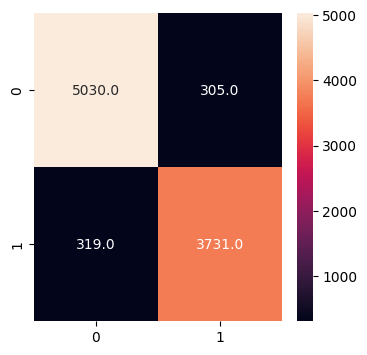

In [ ]:
#confusion matrix
con_mat_naive = confusion_matrix(y_test,y_pred_naive)

#plot confusion matrix
sns.heatmap(con_mat_naive,annot=True,fmt=".1f")

We get 91% acccuracy with Naive Bayes Classifier.

## **Accuracy Metrics for All Fitted Model**

In [ ]:
#Creating a function to return all Models Accuracy Score

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [ ]:
models=[log_class,clf_decision_tree,clf_rf,knn_classifier,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbor','support vector machine','Naive Bayes Classifier']

In [ ]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],x_train,x_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")


-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.947290    0.942781
1  Precsion_Score     0.940027    0.938358
2    Recall_Score     0.935788    0.928395
3   Roc_Auc_Score     0.945796    0.941049

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.943489    0.934790
1  Precsion_Score     0.935211    0.931910
2    Recall_Score     0.931697    0.915802
3   Roc_Auc_Score     0.941958    0.932503

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.956170    0.941076
1  Precsion_Score     0.951269    0.941206
2    Recall_Score     0.945391    0.920988
3   Roc_Auc_Score     0.954770    0.938657

-*-*--*-*--*-*-k_neighbor-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.956596  

# **Conclusion**

•	Solo Lesisure has the highest value counts, we can  conclude that most people who travel by airline travel is solo.37.22% people who travel by airline is solo. Followed by couple and family.

•	We can conclude that most of the people around 78.44% people choose economy class to travel by airline. Followed by Business class and others.

•	50% passenger are giving 4.0 and 5.0 rating for cabin-service when overall rating of airline is good. So we can say good cabin-service positively impacts airline businesses.

•	30% people are not satisfied with entertainment service. As they give 1.0 rating.

•	38% people are giving 4.0 and 5.0 rating for seat comfort. So overall rating is bad. So we can say that bad value for entertainment service negatively impact airline business.

•	42% passengers gave an overall rating below 3.0 . So it, suggests that people are not very much satisfied with airline services. There are still need of improvements

•	We performed Hyperparameter tuning using Grid search CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbour ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done.

•	 We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.We can conclude that Logistic Regression gives the best model.

•	 Model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

•	 The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommended a particular airline to his/her friends.

•	In order to increase their business or grow, our client must provide excellent cabin service, ground service, food-beverage entertainment, and seat comfort.

